In [6]:
# Data Manipulation & Plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import (KernelCenterer, StandardScaler, MinMaxScaler)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (RandomizedSearchCV, GridSearchCV)
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Linear Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

# Reading Data, Maneuver data to binary class to increase accuracy

In [2]:
df = pd.read_csv('CO2_emissions.csv', engine='python')
df = df.rename(columns={'Fuel_Consumption_comb(L/100km)':'total_fuel_consumption'})
df = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption', 'Smog_Level']]

# Convert to binary, highly increase the accuracy
# df.loc[:, 'Smog_Level'][df.Smog_Level <= 4] = 0
# df.loc[:, 'Smog_Level'][df.Smog_Level > 4] = 1

X = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption']]
y = df.Smog_Level
# df

## Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

# KNN & Graphing + CV + Best Parameter & Clustering graphing

In [4]:
# grid search 
# Dont run this code, laggy...
kNN = KNeighborsClassifier()

p_param = list(range(1,11))
n_neighbors_param = list(range(1,100))
hyperparameters = {'n_neighbors':n_neighbors_param, 'weights':('uniform', 'distance'), 'p':p_param}

start = time.time()
clf = GridSearchCV(kNN, hyperparameters, n_jobs=-1)
clf.fit(X, y)
end = time.time()
print(f'Time consumed: {end-start:.3}')
print(f'clf.best_score_={clf.best_score_:.3}, clf.best_params_={clf.best_params_}')

Time consumed: 18.9
clf.best_score_=0.503, clf.best_params_={'n_neighbors': 94, 'p': 2, 'weights': 'distance'}


p ranges 1 to 10, n_neighbors ranges 1, 100

In [5]:
kNN = KNeighborsClassifier(n_neighbors=94, p=2, weights='distance')
kNN.fit(X_train, y_train)
knn_score = kNN.score(X_test, y_test)
print('Before PCA dimensionality reduction')
print(f'Training Accuracy: {kNN.score(X_train, y_train):.3}')
print(f'Test Accuracy: {kNN.score(X_test, y_test):.3}')

Before PCA dimensionality reduction
Training Accuracy: 0.817
Test Accuracy: 0.585


# PCA Dimensionality Reduction to increase the accuracy

p ranges 1 to 10, n_neighbors ranges 1, 100

In [6]:
pca = PCA(n_components=2, random_state=0)
pca.fit(X)
X_new = pca.transform(X)
# print(X_new)

In [7]:
p_param = list(range(1,11))
n_neighbors_param = list(range(1,100))
hyperparameters = {'n_neighbors':n_neighbors_param, 'weights':('uniform', 'distance'), 'p':p_param}
start = time.time()
clf = GridSearchCV(kNN, hyperparameters, n_jobs=-1)
clf.fit(X_new, y)
end = time.time()
print(f'Time consumed: {end-start:.3}')
print(f'clf.best_score_={clf.best_score_:.3}, clf.best_params_={clf.best_params_}')

Time consumed: 11.5
clf.best_score_=0.494, clf.best_params_={'n_neighbors': 60, 'p': 2, 'weights': 'distance'}


In [8]:
# PCA dimensionality reduction to increase the accuracy
pca = PCA(n_components=2, random_state=0)
pca.fit(X)
X_new = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, stratify=y)


kNN_reduced = KNeighborsClassifier(n_neighbors=60, p=2, weights='distance')
kNN_reduced.fit(X_train, y_train)
knn_reducedDim_score = kNN_reduced.score(X_test, y_test)
# print(kNN_reduced.score(X_train, y_train))
print('After PCA dimensionality reduction')
print(f'Training Accuracy: {kNN_reduced.score(X_train, y_train):.3}')
print(f'Test Accuracy: {kNN_reduced.score(X_test, y_test):.3}')

After PCA dimensionality reduction
Training Accuracy: 0.823
Test Accuracy: 0.628


## Plot 2D reduced dimensionality graph

D:\python\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


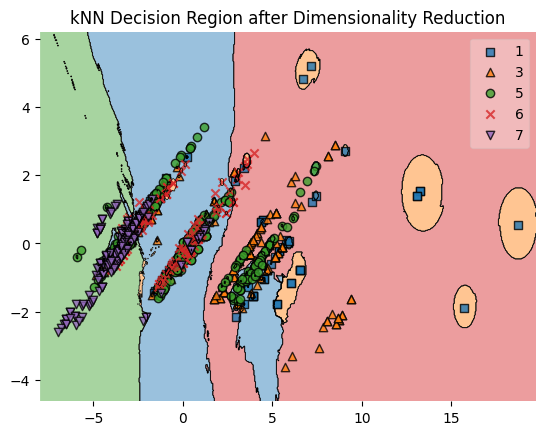

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_new, y=y.to_numpy(), clf=kNN_reduced)
plt.title('kNN Decision Region after Dimensionality Reduction')
plt.savefig('knnReduced.png')

In [ ]:
# df.groupby('Smog_Level').describe()

# Scaling to increase the accuracy

## Standard Scaling

In [17]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, stratify=y)

In [15]:
kNN = KNeighborsClassifier()

p_param = list(range(1,11))
n_neighbors_param = list(range(1,100))
hyperparameters = {'n_neighbors':n_neighbors_param, 'weights':('uniform', 'distance'), 'p':p_param}

start = time.time()
clf = GridSearchCV(kNN, hyperparameters, n_jobs=-1)
clf.fit(X_new, y)
end = time.time()
print(f'Time consumed: {end-start:.3}')
print(f'clf.best_score_={clf.best_score_:.3}, clf.best_params_={clf.best_params_}')

Time consumed: 11.2
clf.best_score_=0.494, clf.best_params_={'n_neighbors': 87, 'p': 10, 'weights': 'distance'}


In [19]:
kNN = KNeighborsClassifier(n_neighbors=87, p=10, weights='distance')
kNN.fit(X_train, y_train)

print('After Scaling')
print(f'Training Accuracy: {kNN.score(X_train, y_train):.3}')
print(f'Test Accuracy: {kNN.score(X_test, y_test):.3}')

After Scaling
Training Accuracy: 0.823
Test Accuracy: 0.637


## KMeans Clustering 3D Visualization

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

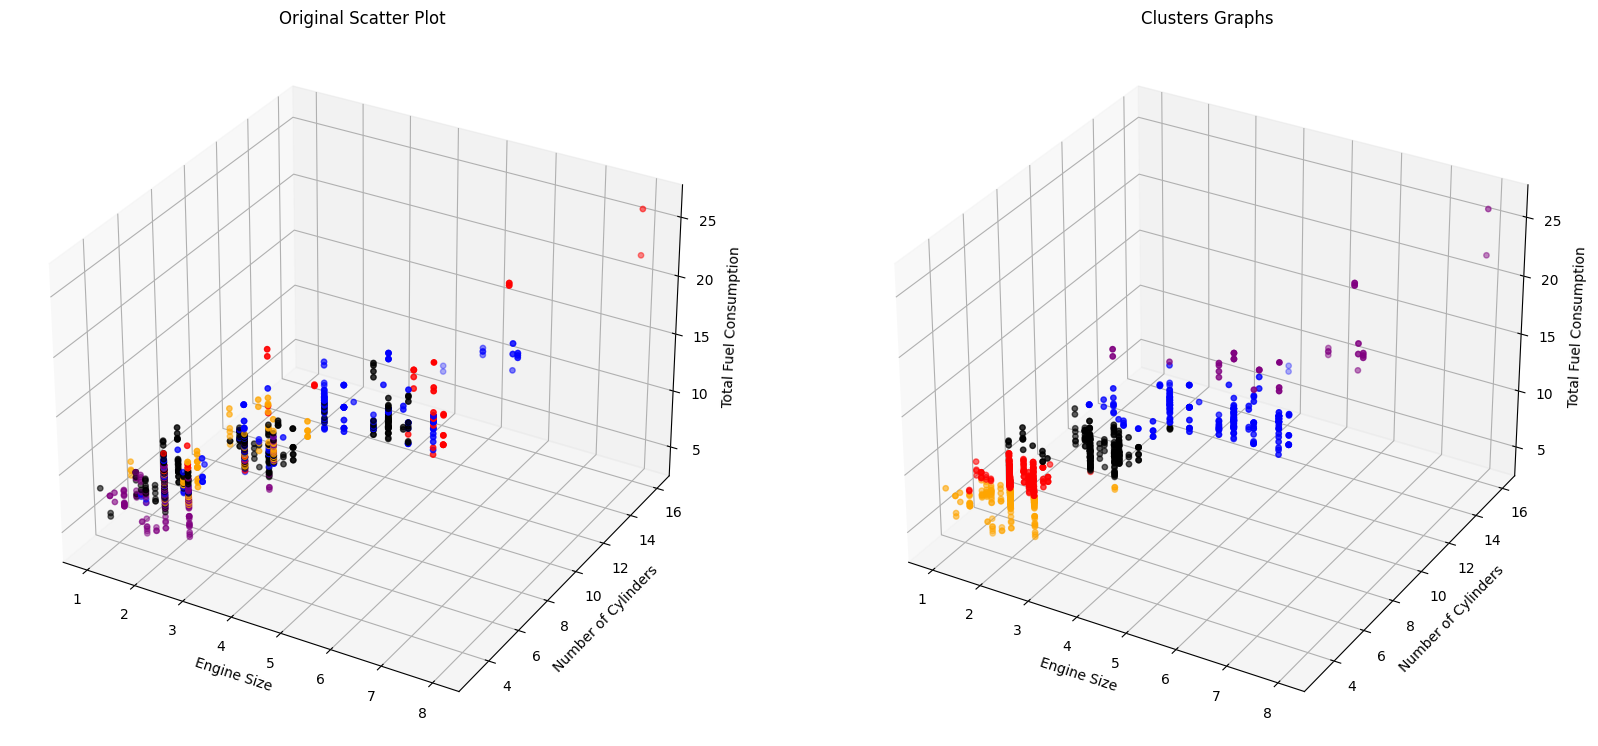

In [22]:
df_new = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption', 'Smog_Level']]
# X.groupby('cluster').describe()
colors = ['red', 'blue', 'black', 'orange', 'purple']
df_new['c'] = df_new.Smog_Level.map({1:colors[0], 3:colors[1], 5:colors[2], 6:colors[3], 7:colors[4]})

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df_new.Engine_Size, df_new.Cylinders, df_new.total_fuel_consumption, c=df_new.c, s=15)
ax.set_title('Original Scatter Plot')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Number of Cylinders')
ax.set_zlabel('Total Fuel Consumption')
# plt.savefig('3D_KNN.png')

X = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption']]

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
X = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption', 'cluster']]
# X.groupby('cluster').describe()
colors = ['red', 'blue', 'black', 'orange', 'purple']
X['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X.Engine_Size, X.Cylinders, X.total_fuel_consumption, c=X.c, s=15)
ax.set_title('Clusters Graphs')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Number of Cylinders')
ax.set_zlabel('Total Fuel Consumption')
plt.savefig('Comparison.png')
plt.show()

Funny 3D clusters graph

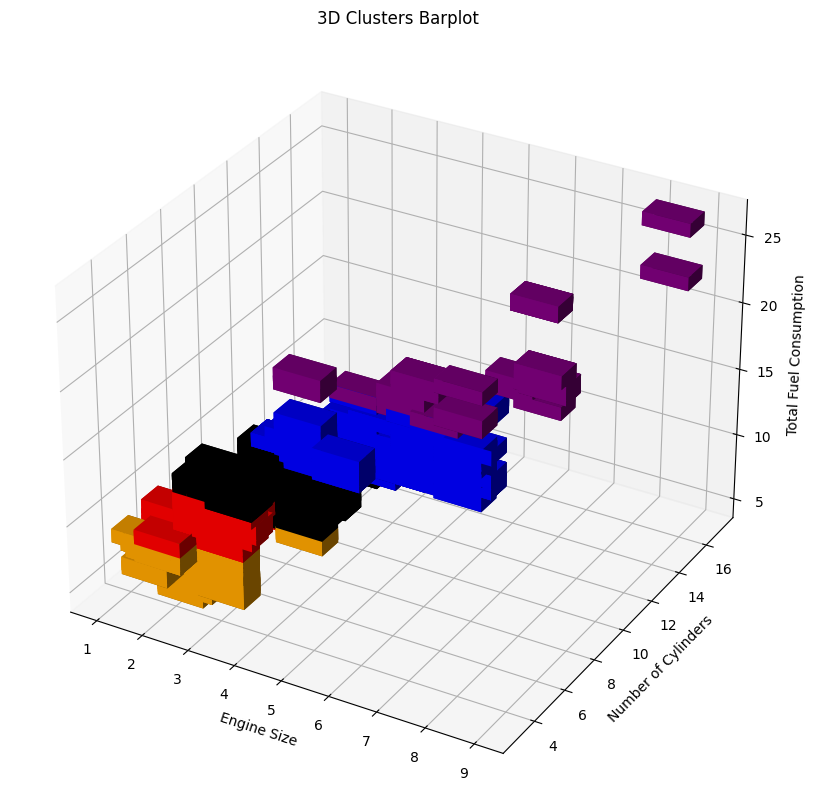

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121, projection='3d')
X = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption']]

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
X = df[['Engine_Size', 'Cylinders', 'total_fuel_consumption', 'cluster']]
# X.groupby('cluster').describe()
colors = ['red', 'blue', 'black', 'orange', 'purple']
X['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.Engine_Size, X.Cylinders, X.total_fuel_consumption,1,1,1, color=X.c)
ax.set_title('3D Clusters Barplot')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Number of Cylinders')
ax.set_zlabel('Total Fuel Consumption')
plt.savefig('3d_cluster_barplot.png')
plt.show()